In [10]:
import pandas as pd
import numpy as np


In [2]:
# Load the Discord dataset
discord_ds = pd.read_csv('Datasets/Ocean Discord Data Challenge Dataset.csv')

# Convert 'Date' column to datetime format with specific format
discord_ds['Date'] = pd.to_datetime(discord_ds['Date'], format='%m/%d/%Y %I:%M %p')

# Group by 'Date' and count the number of messages per day
daily_message_count = discord_ds.groupby(discord_ds['Date'].dt.date)['Content'].count().reset_index()
daily_message_count.rename(columns={'Content': 'MessageCount'}, inplace=True)

# Save the new dataset to a CSV file
daily_message_count.to_csv('Datasets/Daily_Message_Count.csv', index=False)

# Display the new dataset
print(daily_message_count)

            Date  MessageCount
0     2019-08-20             3
1     2019-08-21             2
2     2019-08-22            16
3     2019-08-23             1
4     2019-08-24             1
...          ...           ...
1532  2024-02-16            12
1533  2024-02-17            15
1534  2024-02-18            41
1535  2024-02-19            45
1536  2024-02-20            45

[1537 rows x 2 columns]


In [3]:
daily_message_count = pd.read_csv('Datasets/Daily_Message_Count.csv')

# Load the Ocean dataset
ocean_ds = pd.read_csv('Datasets/OCEAN-USD-4.csv')

# Convert 'Date' column to datetime format
ocean_ds['Date'] = pd.to_datetime(ocean_ds['Date'])
daily_message_count['Date'] = pd.to_datetime(daily_message_count['Date'])

# Merge datasets on 'Date'
merged_dataset = pd.merge(ocean_ds, daily_message_count, on='Date', how='inner')

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Datasets/Merged_Dataset.csv', index=False)

# Display the merged dataset
print(merged_dataset)

           Date      Open      High       Low     Close  Adj Close     Volume  \
0    2020-01-01  0.037197  0.039687  0.034801  0.039226   0.039226   12577450   
1    2020-01-02  0.039209  0.039322  0.034053  0.034784   0.034784   10414026   
2    2020-01-03  0.034774  0.038628  0.034186  0.036693   0.036693   11271250   
3    2020-01-04  0.036902  0.037932  0.034299  0.035934   0.035934    9659167   
4    2020-01-07  0.035181  0.035890  0.030010  0.031966   0.031966   10198327   
...         ...       ...       ...       ...       ...        ...        ...   
1430 2024-02-16  0.507718  0.553000  0.505231  0.536211   0.536211   61528461   
1431 2024-02-17  0.536233  0.712000  0.530191  0.698528   0.698528  267212528   
1432 2024-02-18  0.699218  0.727635  0.638560  0.682886   0.682886  322802245   
1433 2024-02-19  0.682951  0.800114  0.682951  0.720921   0.720921  251326006   
1434 2024-02-20  0.720933  0.755860  0.663478  0.737320   0.737320  121986641   

      MessageCount  
0     

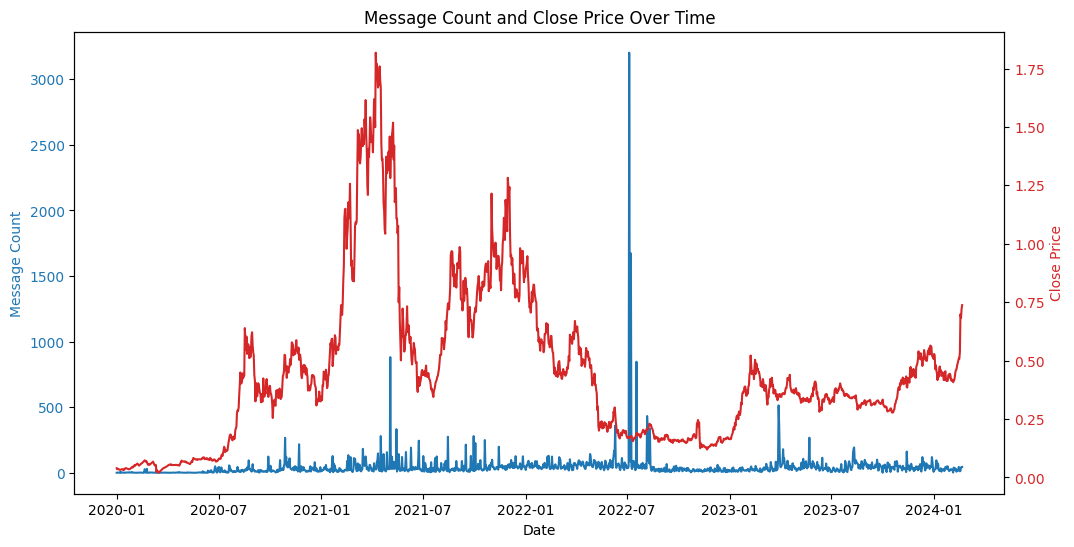

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'merged_dataset' with 'Date', 'MessageCount', 'Close'
# Convert 'Date' column to datetime format if not already done
merged_dataset['Date'] = pd.to_datetime(merged_dataset['Date'])

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data (MessageCount)
ax1.set_xlabel('Date')
ax1.set_ylabel('Message Count', color='tab:blue')
ax1.plot(merged_dataset['Date'], merged_dataset['MessageCount'], color='tab:blue', label='Message Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the second set of data (Close price)
ax2 = ax1.twinx()
ax2.set_ylabel('Close Price', color='tab:red')
ax2.plot(merged_dataset['Date'], merged_dataset['Close'], color='tab:red', label='Close Price')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Show the plot
plt.title('Message Count and Close Price Over Time')
plt.show()
